Creating training data to form an exponential growth shape

In [ ]:
import torch
torch.manual_seed(0)

observations = 2048

train_data = torch.zeros((observations, 2)) # creates a tensor with 2048 rows and 2 columns
train_data[:, 0] = 50 * torch.rand(observations) # generates values of x between 0 and 50
train_data[:, 1] = 1.08 ** train_data[:, 0] # generates values of y based on the relation y = 1.08^x

In [9]:
"""
Exercise 3.1
Modify listing 3.1 so that the relation between x and y is y = sin(x) by using the torch
.sin() function. Set the value of x between -5 and 5 by using this line of code: train_
data[:,0]=10*(torch.rand(observations)-0.5)
"""
train_data_sin = torch.zeros((observations, 2))
train_data_sin[:,0] = 10*(torch.rand(observations)-0.5)
train_data_sin[:, 1] = torch.sin(train_data_sin[:, 0])

Visualizing the relation between x and y

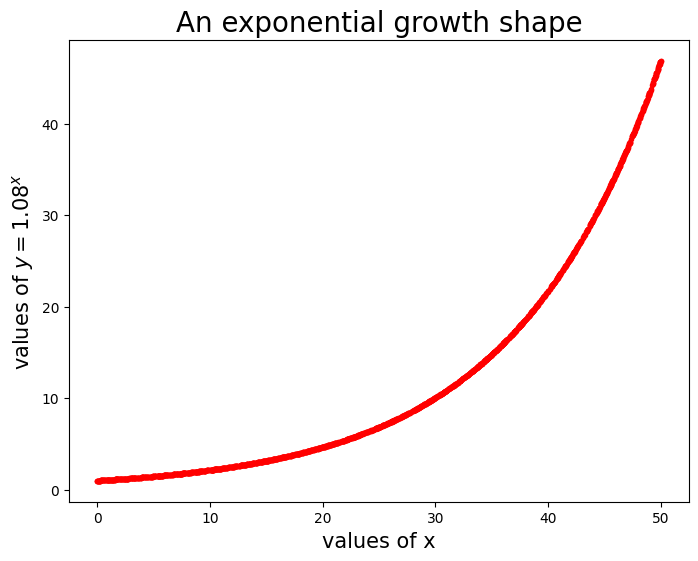

In [10]:
import matplotlib.pyplot as plt
fig=plt.figure(dpi=100,figsize=(8,6))
plt.plot(train_data[:,0],train_data[:,1],".",c="r")
plt.xlabel("values of x",fontsize=15)
plt.ylabel("values of $y=1.08^x$",fontsize=15)
plt.title("An exponential growth shape",fontsize=20)
plt.show()

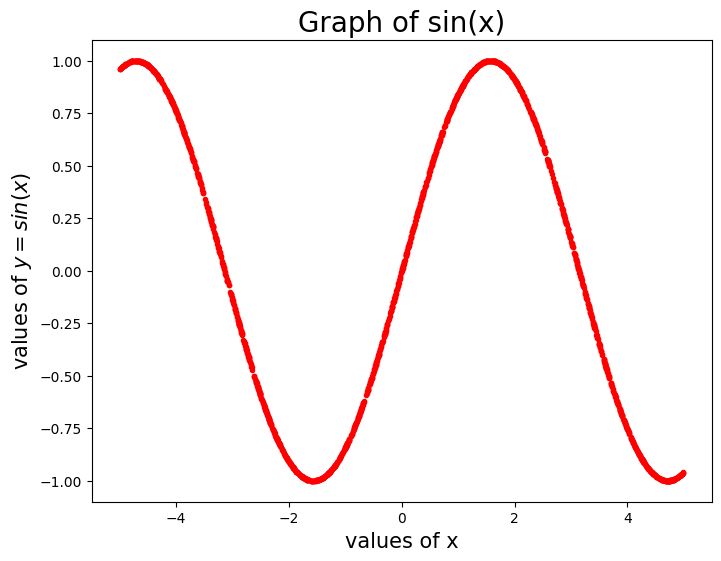

In [11]:
"""
Exercise 3.2
Modify listing 3.2 to plot the relation between x and y = sin(x) based on your changes in
exercise 3.1. Make sure you change the y-axis label and the title in the plot to reflect the
changes you made
"""


import matplotlib.pyplot as plt
fig=plt.figure(dpi=100,figsize=(8,6))
plt.plot(train_data_sin[:,0],train_data_sin[:,1],".",c="r")
plt.xlabel("values of x",fontsize=15)
plt.ylabel("values of $y=sin(x)$",fontsize=15)
plt.title("Graph of sin(x)",fontsize=20)
plt.show()

Preparing the training dataset

In [21]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(
    train_data,
    batch_size = batch_size,
    shuffle = True
)

Creating a discriminator network

In [23]:
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

D = nn.Sequential(
    nn.Linear(2, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, 1),
    nn.Sigmoid()
    ).to(device)